[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\33766\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<AxesSubplot:>

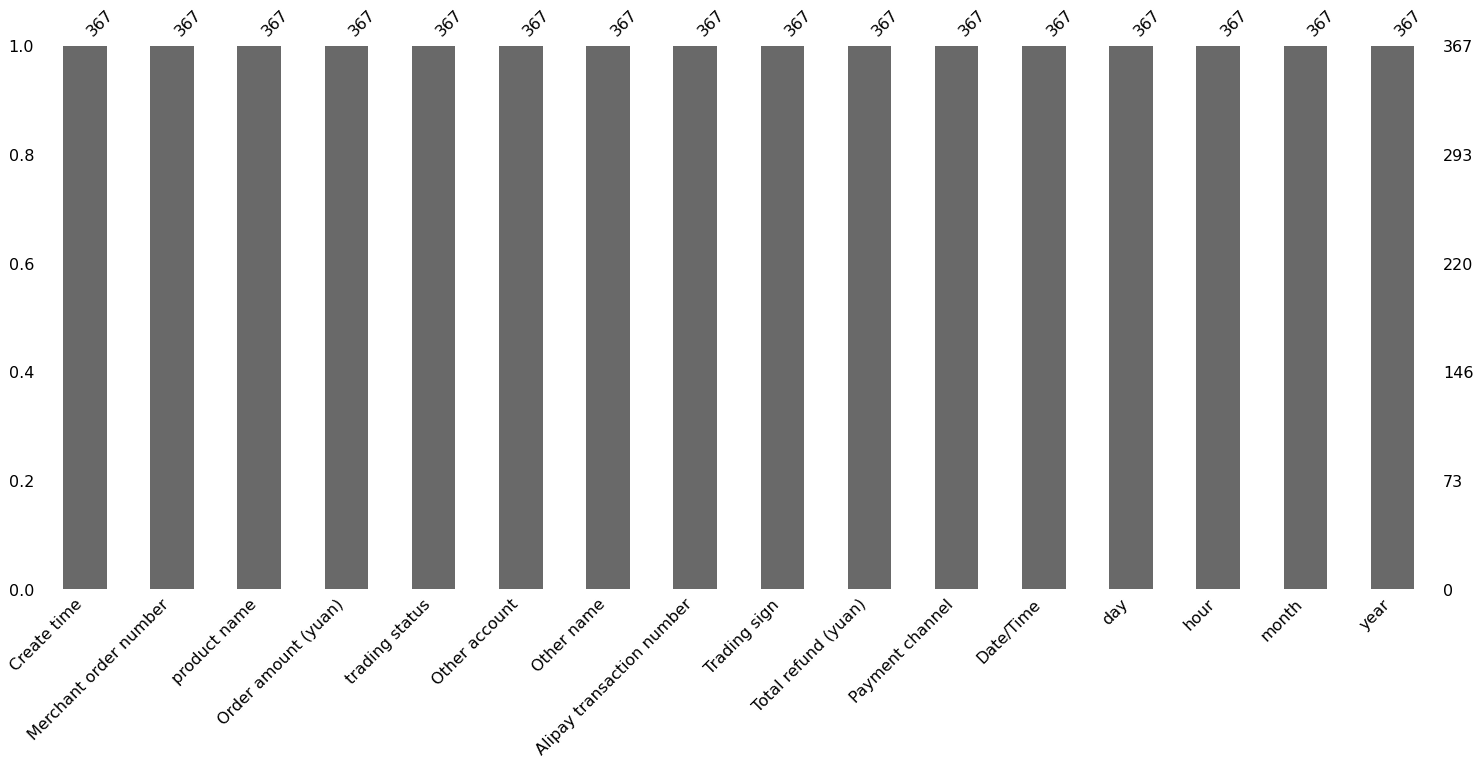

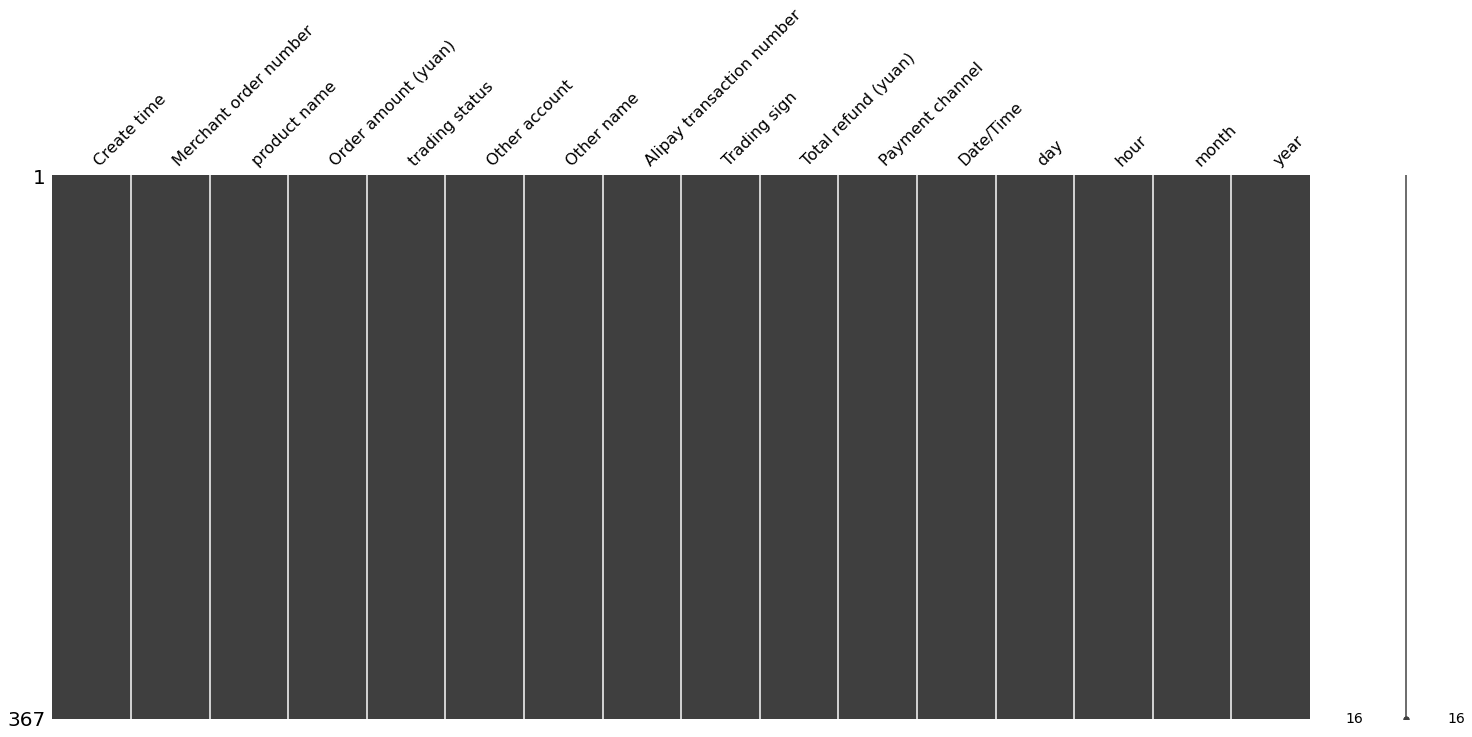

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
import missingno as msno
from PIL import Image
nltk.download('punkt')
import re
path = "C:/alipay2.csv"
df = pd.read_csv(path,delimiter=',')
path2 = r'C:\Users\33766\Desktop\ali.csv'
#text = (open(path2,'r',encoding='utf-8')).read()
with open(path2,'r',encoding='utf-8') as file:
    u=file.read()
str=re.sub('[^\w ]','',u)
df['Date/Time']=df['Create time'].map(pd.to_datetime)
def get_dom(dt):
    return dt.day
def get_hour(dt):
    return dt.hour
def get_month(dt):
    return dt.month
def get_year(dt):
    return dt.year
def count_rows(rows):
    return len(rows)


df['day']=df['Date/Time'].map(get_dom)
df['hour']=df['Date/Time'].map(get_hour)
df['month']=df['Date/Time'].map(get_month)
df['year']=df['Date/Time'].map(get_year)
by_date = df.groupby('day').apply(count_rows)
by_month = df.groupby('month').apply(count_rows)
msno.bar(df)
msno.matrix(df)

In [2]:
df.head()

,Create time,Merchant order number,product name,Order amount (yuan),trading status,Other account,Other name,Alipay transaction number,Trading sign,Total refund (yuan),Payment channel,Date/Time,day,hour,month,year
0,7/6/2021 0:04,T200P1927934678391837054,Suitable for Rolls-Royce Phantom Accumulatte M...,387.00,success,Yishanqcyp@163.com,"Guangzhou Yishan Auto Products Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-06 00:04:00,6,0,7,2021
1,7/6/2021 9:07,T200P1928831439291837054,Shipping differences Price express delivery sh...,33.00,success,Yishanqcyp@163.com,"Guangzhou Yishan Auto Products Co., Ltd.",2.02e + 27,Buy,0,Yuetong,2021-07-06 09:07:00,6,9,7,2021
2,7/10/2021 15:20,Visionpayf57be65625bb0c452c90b095,Smart container consumption,8.98,success,AliUBox@uboxol.com,"Beijing Youbao Alex Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-10 15:20:00,10,15,7,2021
3,7/14/2021 10:31,CPR2107141031146472037256402O,Hello booster car riding,2.50,success,Gejianbo@hellobike.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,ep-dcard,2021-07-14 10:31:00,14,10,7,2021
4,7/14/2021 12:30,CPR2107141230207702037256402SS,Hello booster car riding,2.50,success,Gejianbo@hellobike.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-14 12:30:00,14,12,7,2021


In [3]:
df.describe()

,Order amount (yuan),Total refund (yuan),day,hour,month,year
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,179.040981,19.286104,14.160763,13.337875,6.324251,2020.662125
std,352.945445,116.600211,9.089343,7.134558,3.622340,0.473631
min,0.100000,0.000000,1.000000,0.000000,1.000000,2020.000000
25%,4.430000,0.000000,5.000000,10.000000,3.000000,2020.000000
50%,50.000000,0.000000,14.000000,13.000000,6.000000,2021.000000
75%,125.000000,0.000000,23.000000,20.000000,10.000000,2021.000000
max,2170.000000,750.000000,31.000000,23.000000,12.000000,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Create time                367 non-null    object        
 1   Merchant order number      367 non-null    object        
 2   product name               367 non-null    object        
 3   Order amount (yuan)        367 non-null    float64       
 4   trading status             367 non-null    object        
 5   Other account              367 non-null    object        
 6   Other name                 367 non-null    object        
 7   Alipay transaction number  367 non-null    object        
 8   Trading sign               367 non-null    object        
 9   Total refund (yuan)        367 non-null    int64         
 10  Payment channel            367 non-null    object        
 11  Date/Time                  367 non-null    datetime64[ns]
 12  day     

In [5]:
#df['Order amount (yuan)']=pd.DataFrame(df['Order amount (yuan)'],dtype=np.float)
df['Order amount (yuan)']=np.array(df['Order amount (yuan)'],dtype=np.float)
df['Order amount (yuan)']=pd.DataFrame(df['Order amount (yuan)'])

C:\Users\33766\AppData\Local\Temp/ipykernel_13228/1525161152.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Order amount (yuan)']=np.array(df['Order amount (yuan)'],dtype=np.float)


In [6]:
df['Order amount (yuan)']

0      387.00
1       33.00
2        8.98
3        2.50
4        2.50
        ...  
362     25.00
363     25.00
364    250.00
365    200.00
366    387.00
Name: Order amount (yuan), Length: 367, dtype: float64

In [7]:
df['Date/Time']=df['Create time'].map(pd.to_datetime)

In [8]:
df['Date/Time']=df['Create time'].map(pd.to_datetime)
def get_dom(dt):
    return dt.day
def get_hour(dt):
    return dt.hour
def get_month(dt):
    return dt.month
df['day']=df['Date/Time'].map(get_dom)
df['hour']=df['Date/Time'].map(get_hour)
df['month']=df['Date/Time'].map(get_month)

In [9]:
df.head()

,Create time,Merchant order number,product name,Order amount (yuan),trading status,Other account,Other name,Alipay transaction number,Trading sign,Total refund (yuan),Payment channel,Date/Time,day,hour,month,year
0,7/6/2021 0:04,T200P1927934678391837054,Suitable for Rolls-Royce Phantom Accumulatte M...,387.00,success,Yishanqcyp@163.com,"Guangzhou Yishan Auto Products Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-06 00:04:00,6,0,7,2021
1,7/6/2021 9:07,T200P1928831439291837054,Shipping differences Price express delivery sh...,33.00,success,Yishanqcyp@163.com,"Guangzhou Yishan Auto Products Co., Ltd.",2.02e + 27,Buy,0,Yuetong,2021-07-06 09:07:00,6,9,7,2021
2,7/10/2021 15:20,Visionpayf57be65625bb0c452c90b095,Smart container consumption,8.98,success,AliUBox@uboxol.com,"Beijing Youbao Alex Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-10 15:20:00,10,15,7,2021
3,7/14/2021 10:31,CPR2107141031146472037256402O,Hello booster car riding,2.50,success,Gejianbo@hellobike.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,ep-dcard,2021-07-14 10:31:00,14,10,7,2021
4,7/14/2021 12:30,CPR2107141230207702037256402SS,Hello booster car riding,2.50,success,Gejianbo@hellobike.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-07-14 12:30:00,14,12,7,2021


(array([15., 15., 14., 15., 38., 15.,  6.,  4., 12., 13., 12., 15.,  2.,
        30., 15., 16.,  3.,  2., 14., 11.,  3.,  3., 19.,  3.,  9., 14.,
         6., 15.,  7., 17.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <BarContainer object of 30 artists>)

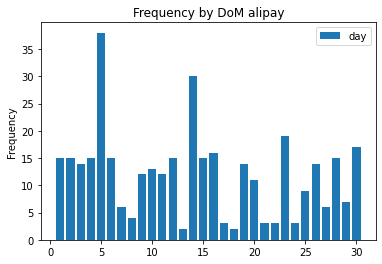

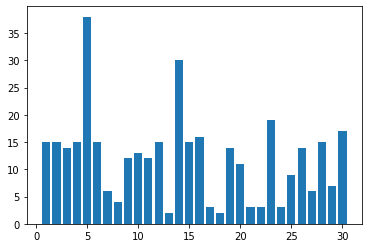

In [10]:
hist = df[["day"]].plot.hist(bins = 30, rwidth = 0.8, range=(0.5,30.5), title = "Frequency by DoM alipay")
fig, ax = plt.subplots()
ax.hist(df[["day"]], bins=30,rwidth = 0.8, range=(0.5,30.5))

In [11]:
def count_rows(rows):
    return len(rows)
by_date = df.groupby('day').apply(count_rows)
by_month = df.groupby('month').apply(count_rows)
by_month.values

array([40, 33, 29, 39, 26, 21, 34, 23, 28, 27, 32, 35], dtype=int64)

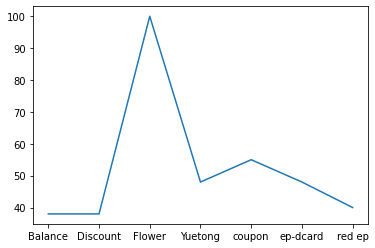

In [12]:
b1 = df.groupby('Payment channel').apply(count_rows)
plt.plot(b1)

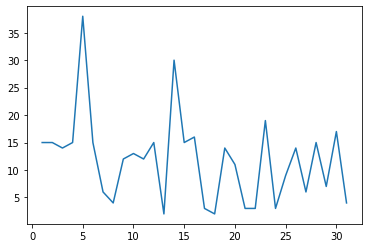

In [13]:
plt.plot(by_date)

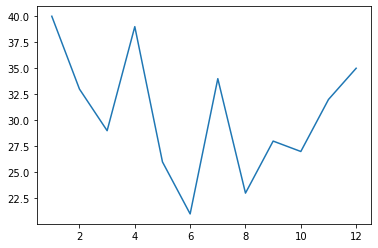

In [14]:
plt.plot(by_month,label='ff')


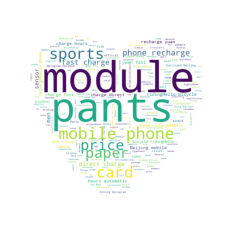

In [15]:
from wordcloud import WordCloud
img = Image.open(r'C:\ll.png','r')
img_array = np.array(img)
wc = WordCloud(
    background_color='white',
    width=1000,
    height=800,
    mask=img_array,
    min_font_size = 2
    #stopwords='BUFF'
)
wc.generate_from_text(str)#绘制图片
plt.imshow(wc)
plt.axis('off')

plt.show()
#wc.to_file(r"C:\picture.png")

In [16]:
# 按照Pay channel汇总
data_1 = df.groupby('Payment channel').mean()['Order amount (yuan)']
data_1.index
#data_1.values

Index(['Balance', 'Discount', 'Flower', 'Yuetong', 'coupon', 'ep-dcard',
       'red ep'],
      dtype='object', name='Payment channel')

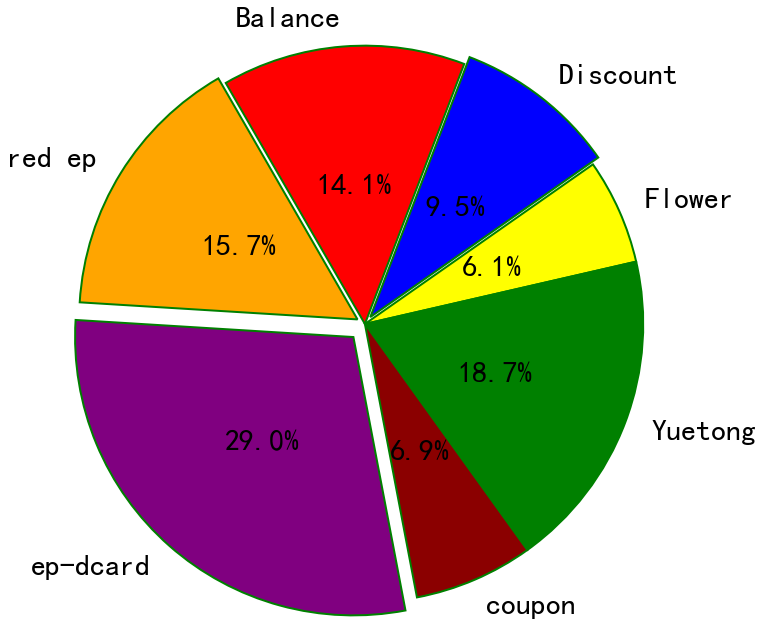

In [17]:
x_data = data_1.values
y_labels = data_1.index
explode = [0,0.1,0,0,0,0.2,0.1]
colors=['red','blue','yellow','green','darkred','purple','orange']  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.axes(aspect='equal')
plt.pie(x = x_data, 
        explode=explode, 
        labels=y_labels, 
        colors=colors, 
        autopct='%.1f%%',
        pctdistance=0.5, 
        labeldistance = 1.1,
        startangle = 120,
        radius = 3.2, 
        counterclock = False, 
        wedgeprops = {'linewidth': 2, 'edgecolor':'green'},
        textprops = {'fontsize':30, 'color':'black'}, # 设置文本标签的属性值
        )
#plt.title('way to cost',pad =180)
plt.show()

In [18]:
# 按照month汇总
data_2 = df.groupby('month').sum()['Order amount (yuan)']
#data_2.index
data_2.values

array([ 6545.97,  4271.4 , 13108.66,  4744.51,  4096.72,  6501.9 ,
        3001.28,  2228.68,  3272.1 ,  3704.98,  2323.19, 11908.65])

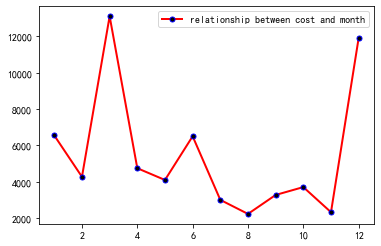

In [19]:
x = data_2.index
y = data_2.values
plt.plot(x,y,ls='-',lw=2,marker='o',markersize=5,c= 'red',markeredgecolor ='blue',markerfacecolor='black',label='relationship between cost and month')
plt.legend(loc= 'best')
plt.show()

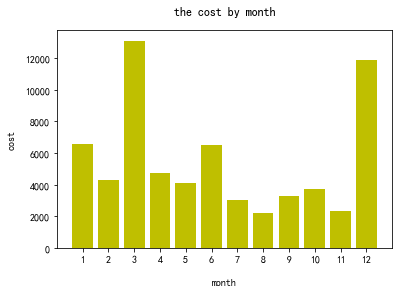

In [20]:
x_data = data_2.values
y_labels = data_2.index
#labels = ['q','a','c','e','r','j','b','p']
plt.bar(x = range(0,len(x_data)),height = x_data,align='center',color='y',tick_label= y_labels)
plt.xlabel('month',labelpad = 15)  # 控制标签和坐标轴的距离
plt.ylabel('cost',labelpad =10)
plt.title('the cost by month',pad=15)
plt.show()

(0.0, 24.0)

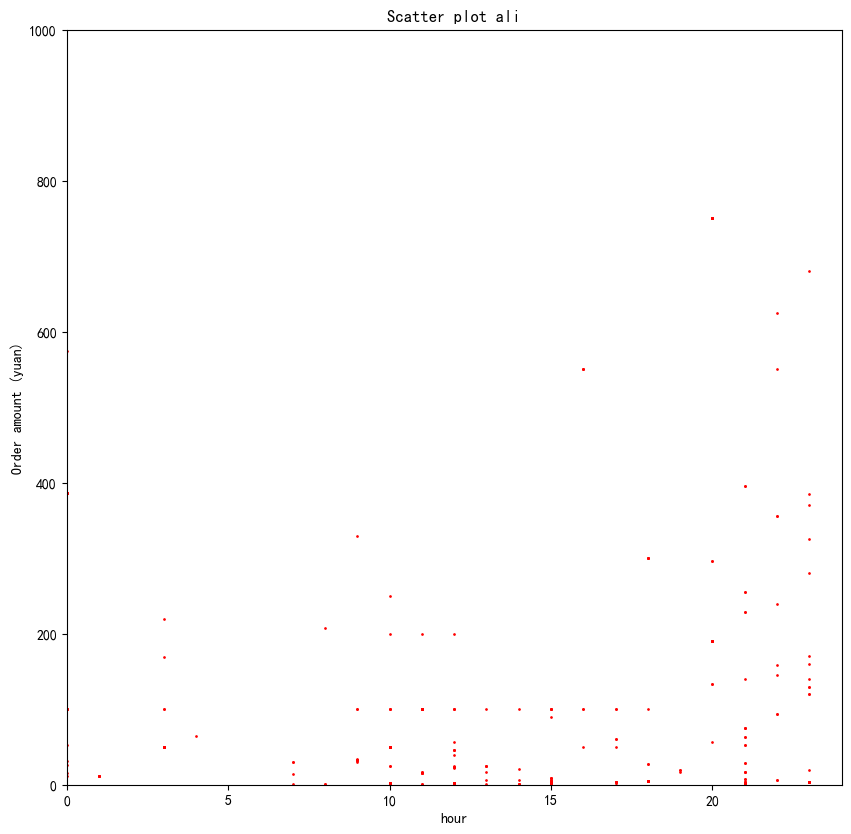

In [21]:
plt.figure(figsize=(10, 10), dpi = 100)
plt.title('Scatter plot ali')
plt.xlabel('hour')
plt.ylabel('Order amount (yuan)')
plt.scatter(df['hour'].to_list(),df['Order amount (yuan)'].to_list(),s=0.9,c='red',alpha=1.0)
plt.ylim(0, 1000)
#plt.xlim(0.5,24)
plt.xlim(0,24)

In [22]:
import pyecharts
pyecharts.__version__
#from pyecharts import Bar
#pyecharts.__file__

'1.9.0'

In [23]:
# 按照Pay channel汇总
data_1 = df.groupby('Payment channel').mean()['Order amount (yuan)']
data_1.index
#data_1.values

Index(['Balance', 'Discount', 'Flower', 'Yuetong', 'coupon', 'ep-dcard',
       'red ep'],
      dtype='object', name='Payment channel')

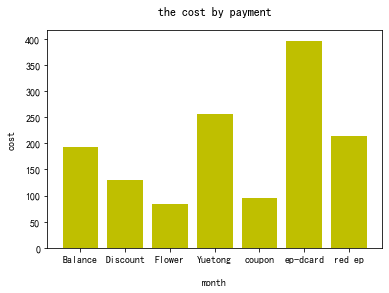

In [24]:
x_data = data_1.values
y_labels = data_1.index
#labels = ['q','a','c','e','r','j','b','p']
plt.bar(x = range(0,len(x_data)),height = x_data,align='center',color='y',tick_label= y_labels)
plt.xlabel('month',labelpad = 15)  # 控制标签和坐标轴的距离
plt.ylabel('cost',labelpad =10)
plt.title('the cost by payment',pad=15)
plt.show()

In [25]:
current_month = 12
dff3 = (df[df['month'].eq(current_month)].sort_values(by='Order amount (yuan)', ascending = True).head(20))

In [26]:
dff1= (df[df['Payment channel'].isin(data_1.index)].sort_values(by='Order amount (yuan)', ascending = True))
dff1

,Create time,Merchant order number,product name,Order amount (yuan),trading status,Other account,Other name,Alipay transaction number,Trading sign,Total refund (yuan),Payment channel,Date/Time,day,hour,month,year
196,4/23/2021 12:09,2.32e + 23,Bind Alipay account,0.1,success,du@theduapp.com,Shanghai Intractive Information Technology Co....,2.02e + 27,Buy,0,Yuetong,2021-04-23 12:09:00,23,12,4,2021
12,7/23/2021 12:09,2.32e + 23,Bind Alipay account,0.1,success,du@theduapp.com,Shanghai Intractive Information Technology Co....,2.02e + 27,Buy,0,Yuetong,2021-07-23 12:09:00,23,12,7,2021
255,4/10/2021 17:50,T200P1736816870561837054,Active single page resume template and other p...,0.2,success,8778**@qq.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-04-10 17:50:00,10,17,4,2021
43,4/20/2021 17:50,T200P1736816870561837054,Active single page resume template and other p...,0.2,success,8778**@qq.com,"Shanghai Yizheng Network Technology Co., Ltd.",2.02e + 27,Buy,0,Flower,2021-04-20 17:50:00,20,17,4,2021
123,8/1/2021 7:26,3.02e + 19,Beijing Bus - Time: 2021-07-31 14:04:16,1.0,success,XCX_GJ@163.com,"Beijing Public Transport Holdings (Group) Co.,...",2.02e + 27,Buy,0,Flower,2021-08-01 07:26:00,1,7,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3/30/2021 23:36,4.62e + 22,commodity,1680.0,closure,Beikesm@126.com,"Beijing Public Transport Holdings (Group) Co.,...",2.02e + 27,Buy,0,Yuetong,2021-03-30 23:36:00,30,23,3,2021
48,3/30/2021 23:34,4.62e + 22,commodity,1680.0,closure,Beikesm@126.com,"Hunan Chuang Lebo Intelligent Technology Co., ...",2.02e + 27,Buy,0,Discount,2021-03-30 23:34:00,30,23,3,2021
47,3/30/2021 23:34,4.62e + 22,commodity,1680.0,closure,Beikesm@126.com,"Hunan Chuang Lebo Intelligent Technology Co., ...",2.02e + 27,Buy,0,Yuetong,2021-03-30 23:34:00,30,23,3,2021
25,6/10/2021 14:34,BUFF-210610R1140002796,Netease BUFF recharge (158 **** 3647). Do not ...,1770.0,success,Ptgz1@service.netese.com,"Guangzhou Netease Computer System Co., Ltd.",2.02e + 27,Buy,0,Yuetong,2021-06-10 14:34:00,10,14,6,2021


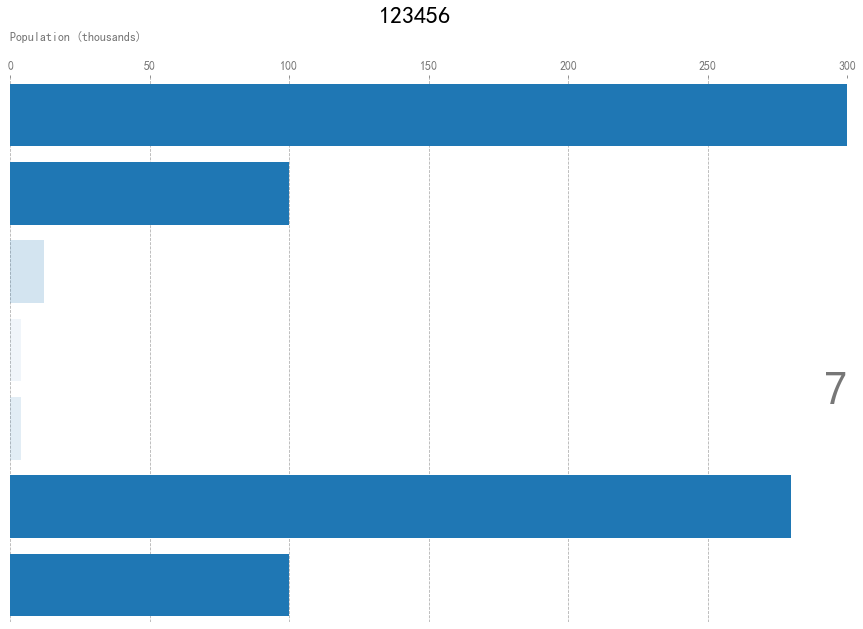

In [27]:
import matplotlib.ticker as ticker 
fig, ax = plt.subplots(figsize = (15, 10))
ax.clear()
dff =dff1[dff1.month==8].sort_values(by='Order amount (yuan)', ascending = True).head(20)
#df_2015 = pe_ct_top10[pe_ct_top10.Year == 2015].sort_values('Population',ascending=False)

x = dff['Payment channel']
y = dff['Order amount (yuan)']
cn = dff['Trading sign'].values.tolist()
#cvalues = list(colors.TABLEAU_COLORS.values())

eb = ax.barh(x, y)
   
for b in eb:
    if b.get_width() < y.mean():
        alpha = b.get_width()/y.mean()
    else:
        alpha = 1.0        
    b.set_alpha(alpha)

dx = y.max()/200

#for i, (p, r,c) in enumerate(zip(y, x,cn)):
    
    #ax.text(p-dx, i, r, size=12, weight=400, ha='right', va='bottom')
    #ax.text(p-dx, i-.25, c,
         #   fontproperties='SimHei',
       #     size=12, ha='right', va='baseline')
    #ax.text(p+dx, i, f'{p/10:,.0f}', size=12, ha='left', va='center',family='Arial')
    
ax.text(1, 0.4, 7, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=900)
ax.text(0, 1.07, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')

ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='--')
ax.set_axisbelow(True)

fig.suptitle('123456',fontsize=24, 
             weight=600, family='SimHei')

plt.box(False)

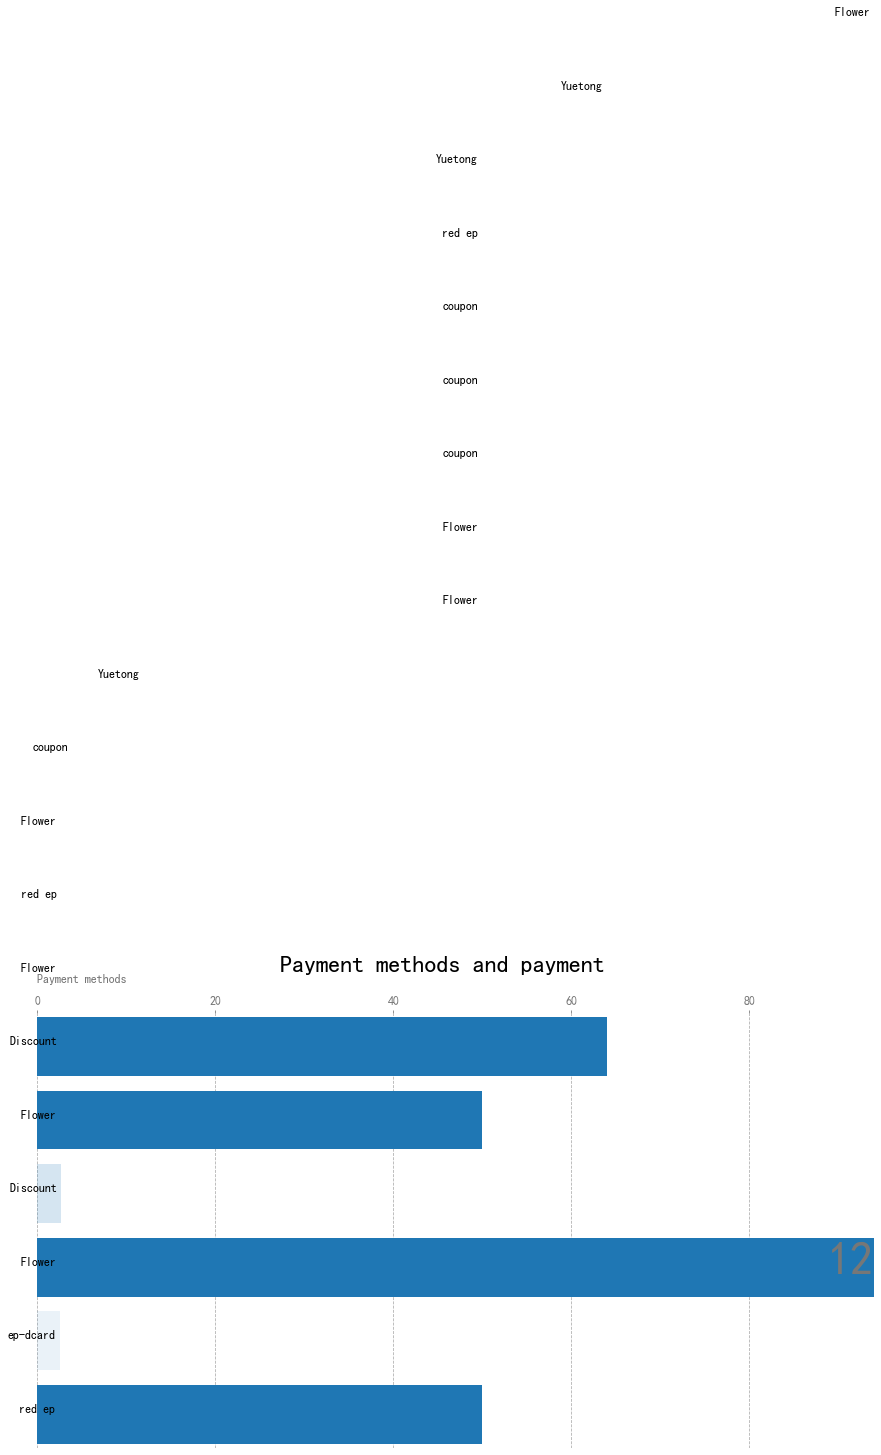

In [28]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML
dff1= (df[df['Payment channel'].isin(data_1.index)].sort_values(by='Order amount (yuan)', ascending = True))
def dynamic_bar(month):
    dff =dff1[dff1['month'].eq(month)].sort_values(by='Order amount (yuan)', ascending = True).head(20)
    ax.clear()
    #df_2015 = pe_ct_top10[pe_ct_top10.Year == 2015].sort_values('Population',ascending=False)

    x = dff['Payment channel']
    y = dff['Order amount (yuan)']
    cn = dff['Trading sign'].values.tolist()
    #cvalues = list(colors.TABLEAU_COLORS.values())

    eb = ax.barh(x, y)

    for b in eb:
        if b.get_width() < y.mean():
            alpha = b.get_width()/y.mean()
        else:
            alpha = 1.0        
        b.set_alpha(alpha)

    dx = y.max()/200

    for i, (p, r,c) in enumerate(zip(y, x,cn)):

        ax.text(p-dx, i, r, size=12, weight=400, ha='right', va='bottom')
        #ax.text(p-dx, i-.25, c,
         #       fontproperties='SimHei',
         #       size=12, ha='right', va='baseline')
        #ax.text(p+dx, i, f'{p/10:,.0f}', size=12, ha='left', va='center',family='Arial')

    ax.text(1, 0.4, month, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=900)
    ax.text(0, 1.07, 'Payment methods', transform=ax.transAxes, size=12, color='#777777')

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')

    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='--')
    ax.set_axisbelow(True)

    fig.suptitle('Payment methods and payment',fontsize=24, 
                 weight=600, family='SimHei')

    plt.box(False)
fig, ax = plt.subplots(figsize = (15, 8))

popu_growth = animation.FuncAnimation(fig, dynamic_bar, 
                                   frames=range(dff1['month'].min(), 13))

HTML(popu_growth.to_jshtml())

In [29]:
# 按照month汇总
data_2 = df.groupby('month').sum()['Order amount (yuan)']
data_3 = df.groupby('Payment channel').sum()['Order amount (yuan)']
month=data_2.index
#data_2.index
data_2.values


array([ 6545.97,  4271.4 , 13108.66,  4744.51,  4096.72,  6501.9 ,
        3001.28,  2228.68,  3272.1 ,  3704.98,  2323.19, 11908.65])

In [30]:
data_3.index

Index(['Balance', 'Discount', 'Flower', 'Yuetong', 'coupon', 'ep-dcard',
       'red ep'],
      dtype='object', name='Payment channel')

In [31]:
colors = dict(zip(data_3.index,['#aab0ff','#ffb3ff','#90d595','#e48348','#aafbff','#f7bb5f','#eafb50']   
))
gl= df.set_index('trading status')

In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Bar
columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data2 = data_2.values
bar=(Bar()
.add_xaxis(columns)
.add_yaxis("cost",[3535.25,  2332.08, 22935.98,  3294.91,  3399.46,  5751.9 ,
        1277.3 ,  1808.68,  2287.52,  3506.48,  2323.19, 12108.65])
.set_global_opts(title_opts=opts.TitleOpts(title="Bar"))
)
bar.render("l.html")
bar.render_notebook()

In [34]:
data_2.values

array([ 6545.97,  4271.4 , 13108.66,  4744.51,  4096.72,  6501.9 ,
        3001.28,  2228.68,  3272.1 ,  3704.98,  2323.19, 11908.65])

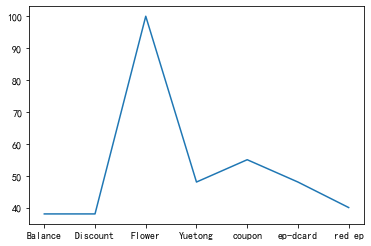

In [35]:
b1 = df.groupby('Payment channel').apply(count_rows)
plt.plot(b1)

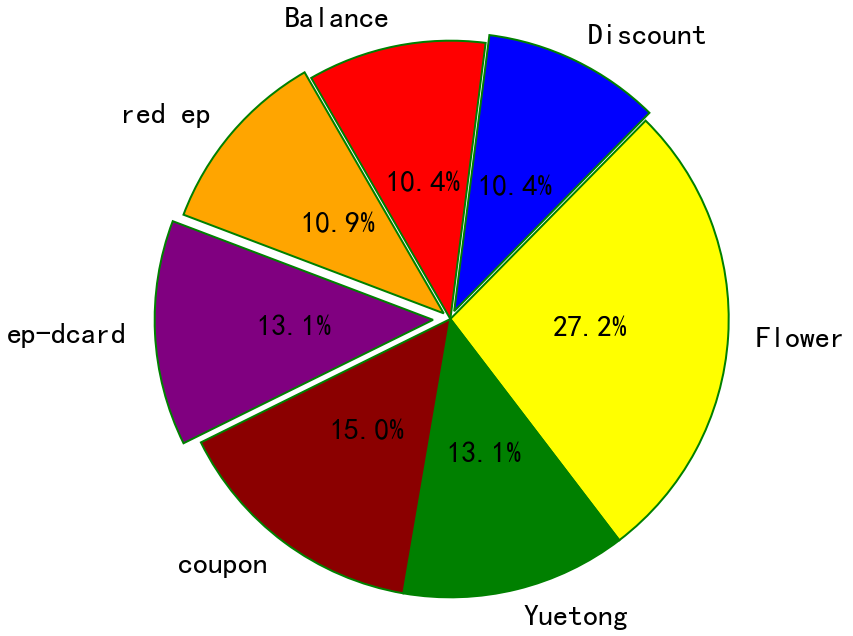

In [36]:
b1 = df.groupby('Payment channel').apply(count_rows)
x_data = b1.values
y_labels = b1.index
explode = [0,0.1,0,0,0,0.2,0.1]
colors=['red','blue','yellow','green','darkred','purple','orange']  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.axes(aspect='equal')
plt.pie(x = x_data, 
        explode=explode, 
        labels=y_labels, 
        colors=colors, 
        autopct='%.1f%%',
        pctdistance=0.5, 
        labeldistance = 1.1,
        startangle = 120,
        radius = 3.2, 
        counterclock = False, 
        wedgeprops = {'linewidth': 2, 'edgecolor':'green'},
        textprops = {'fontsize':30, 'color':'black'}, # 设置文本标签的属性值
        )
#plt.title('way to cost',pad =180)
plt.show()

In [37]:
dff =dff1[dff1.month==8].sort_values(by='Order amount (yuan)', ascending = True).head(20)

In [38]:
dff.values

array([['8/1/2021 7:26', '3.02e + 19',
        'Beijing Bus - Time: 2021-07-31 14:04:16', 1.0, 'success',
        'XCX_GJ@163.com',
        'Beijing Public Transport Holdings (Group) Co., Ltd.',
        '2.02e + 27', 'Buy', 0, 'Flower',
        Timestamp('2021-08-01 07:26:00'), 1, 7, 8, 2021],
       ['8/3/2021 10:31', 'CPR2107141031146472037256402O',
        'Hello booster car riding', 2.5, 'success',
        'Gejianbo@hellobike.com',
        'Shanghai Yizheng Network Technology Co., Ltd.', '2.02e + 27',
        'Buy', 0, 'ep-dcard', Timestamp('2021-08-03 10:31:00'), 3, 10, 8,
        2021],
       ['8/2/2021 10:31', 'CPR2107141031146472037256402O',
        'Hello booster car riding', 2.5, 'success',
        'Gejianbo@hellobike.com',
        'Shanghai Yizheng Network Technology Co., Ltd.', '2.02e + 27',
        'Buy', 0, 'ep-dcard', Timestamp('2021-08-02 10:31:00'), 2, 10, 8,
        2021],
       ['8/5/2021 10:31', 'CPR2107141031146472037256402O',
        'Hello booster car riding', 

In [39]:
date1=df[['Order amount (yuan)','Payment channel','month']]

In [40]:
date1

,Order amount (yuan),Payment channel,month
0,387.00,Flower,7
1,33.00,Yuetong,7
2,8.98,Flower,7
3,2.50,ep-dcard,7
4,2.50,Flower,7
...,...,...,...
362,25.00,red ep,7
363,25.00,ep-dcard,7
364,250.00,ep-dcard,7
365,200.00,red ep,7


In [41]:
path = "C:/alipay2.csv"
df = pd.read_csv(path,delimiter=',')
df['Date/Time']=df['Create time'].map(pd.to_datetime)
def get_month(dt):
    return dt.month

df['month']=df['Date/Time'].map(get_month)
colum=['payment','order_amount']
ht3=pd.DataFrame(columns=colum)
for i in range(1,13):
    data3 = df[df['month'].eq(i)].groupby('Payment channel').sum()['Order amount (yuan)']
    data4 = dict(zip(data3.index,data3.values))
    #转成df
    ht1=pd.DataFrame(pd.Series(data4),columns=['order_amount'])
    ht2=ht1.reset_index().rename(columns={'index':'payment'})
    #合并df
    ht3=ht3.append(ht2,ignore_index=True)
df2=df[['month','Payment channel']]
df3=df2.drop_duplicates()
df3 =df3.sort_values(by='month',ascending = True)
df3.reset_index(drop=True,inplace=True)
#合并两个表
merge_index_df = pd.merge(ht3, df3, how='outer', left_index=True, right_index=True)
dff2 = merge_index_df.drop(['Payment channel'],axis=1)
dff =dff2.sort_values(by='month',ascending = True)
dff.reset_index(drop=True,inplace=True)
month0 = list(range(1,13))
color0 = ['#D6A5DD','#F7DC73','#EBBDBF','#76CBE8','#A4DFE5','#c4e8d9','#153ce3']
color = color0*len(month0)
df6 = pd.DataFrame()
df6['color'] = color
dff5=pd.merge(dff, df6, how='outer', left_index=True, right_index=True)
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline
month0 = list(range(1,13))
color0 = ['#D6A5DD','#F7DC73','#EBBDBF','#76CBE8','#A4DFE5','#c4e8d9','#153ce3']
color = color0*len(month0)
tl = Timeline()
for i in range(1,13):
    df_sub = dff5[dff5['month']==i].sort_values(by='order_amount')
    cats_list = list(df_sub['payment'])
    csum_list = list(df_sub['order_amount'])
    color_list = list(df_sub['color'])
    y=[]
    for j in range(7):
        y.append(
            opts.BarItem(
                name=cats_list[j],
                value=csum_list[j],
                itemstyle_opts=opts.ItemStyleOpts(color=color_list[j]),
            
            )
        )
        
    bar = (
        Bar()
        .add_xaxis(cats_list)
        .add_yaxis("", y,label_opts=opts.LabelOpts(position="right",font_weight="bold"),category_gap=30)
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts("payment_type (time: {} month)".format(i),pos_left=350,padding=[30,20]),
            xaxis_opts=opts.AxisOpts(max_=3000)
        )
    )
    tl.add(bar, "{}month".format(i))
    tl.add_schema(play_interval=600, is_loop_play=True)#播放间隔，是否循环播放
tl.render("667.html")

'C:\\Users\\33766\\667.html'